# Introduction

For this project, we will interpret data from the National Parks Service about endangered species in different parks.


We will perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered. During this project, we will analyze, clean up, and plot data as well as pose questions and seek to answer them in a meaningful way.
 
**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

First load the necessary Python modules used for this project.

In [426]:
import pandas as pd  #Load the libraries we need
import numpy as np
import math
import pprint
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import ticker
sns.set_style('darkgrid')

Then we load the given data from file 'species_info.csv' and name the dataframes as df_species and analyze what kind of information this data gives us.

The Species Info file has 5,824 rows and 4 columns:
 - category - class of animal
 - scientific_name - the scientific name of each species
 - common_name - the common names of each species
 - conservation_status - each species current conservation status

Since the number of lines and number of scientific names (5,541) does not match, there are duplicates. We remove duplicates not considering the column 'common_names', since the names could be spelled differently. 

Then we see two duplicates of species which have different conservation status. Сheck the actual status of these animals on [AnimalDiversity](https://animaldiversity.org) and leave the required lines in the dataframe.

Replace the NaN values with 'Not Evaluated'.


In [427]:
df = pd.read_csv('species_info.csv')
display(df.head())
print('Initial number of lines: ', len(df))
print('Number of unique names: ', df.scientific_name.nunique(), '\n')
df = df.drop_duplicates(subset = ['category', 'scientific_name', 'conservation_status']).reset_index(drop = True) #remove duplicates
print('Species whose status should be checked: ')
display(df[df.scientific_name.duplicated(keep = False)]) #check if there are more duplicates
df = df.drop([8,560])
print('Final number of lines: ',len(df)) 
df_species = df.fillna('Not Evaluated')
df_species = df_species.replace('Not Evaluated','1 - Not Evaluated')
df_species = df_species.replace('Species of Concern','2 - Species of Concern')
df_species = df_species.replace('Threatened','3 - Threatened')
df_species = df_species.replace('Endangered','4 - Endangered')
df_species = df_species.replace('In Recovery','5 - In Recovery')
df_species.head()


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


Initial number of lines:  5824
Number of unique names:  5541 

Species whose status should be checked: 


,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
560,Fish,Oncorhynchus mykiss,Rainbow Trout,NaN
3018,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
3247,Fish,Oncorhynchus mykiss,Rainbow Trout,Threatened


Final number of lines:  5541


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,1 - Not Evaluated
1,Mammal,Bos bison,"American Bison, Bison",1 - Not Evaluated
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",1 - Not Evaluated
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",1 - Not Evaluated
4,Mammal,Cervus elaphus,Wapiti Or Elk,1 - Not Evaluated


Now load the second file 'observations.csv' and name the dataframe as df_observations and analyze what kind of information this data gives us.

We can see that the observations file has 23,296 rows with 3 columns:
 - scientific_name - the scientific name of each species
 - park_name - the name of the park in which this species was observed
 - observations - the number of observations in the past 7 days
 
As we can see the number of unique species is 5541 and this data from 4 parks: 5541*4 = 22164. But the size of the dataframe is 23296 != 22164. It means that there are duplicate lines with different values of observations. For each scientific name in the park we take the average of these observations.
And in the new dataframe we have 4 * 5541 = 22164 lines.


In [428]:
df_observations = pd.read_csv('observations.csv')
print('Number of unique names: ', df_observations.scientific_name.nunique())
print('Data size: ',len(df_observations), '!= 4*', df_observations.scientific_name.nunique(), '= ', 4*df_observations.scientific_name.nunique())
df_observations = df_observations.groupby(['scientific_name','park_name']).observations.mean().reset_index()#remove duplicates with mean value
print('New Data size: ',len(df_observations), '= 4*Number of unique names = ', 4*df_observations.scientific_name.nunique())
df_observations.head()

Number of unique names:  5541
Data size:  23296 != 4* 5541 =  22164
New Data size:  22164 = 4*Number of unique names =  22164


,scientific_name,park_name,observations
0,Abies bifolia,Bryce National Park,109.0
1,Abies bifolia,Great Smoky Mountains National Park,72.0
2,Abies bifolia,Yellowstone National Park,215.0
3,Abies bifolia,Yosemite National Park,136.0
4,Abies concolor,Bryce National Park,83.0


 Now that our data is cleared, we can merge our two dataframes and continue the analysis.
 
 The number of scientific names is the same, we can merge the our dataframes into one.

In [429]:
df = pd.merge(df_observations, df_species)
df

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Abies bifolia,Bryce National Park,109.0,Vascular Plant,Rocky Mountain Alpine Fir,1 - Not Evaluated
1,Abies bifolia,Great Smoky Mountains National Park,72.0,Vascular Plant,Rocky Mountain Alpine Fir,1 - Not Evaluated
2,Abies bifolia,Yellowstone National Park,215.0,Vascular Plant,Rocky Mountain Alpine Fir,1 - Not Evaluated
3,Abies bifolia,Yosemite National Park,136.0,Vascular Plant,Rocky Mountain Alpine Fir,1 - Not Evaluated
4,Abies concolor,Bryce National Park,83.0,Vascular Plant,"Balsam Fir, Colorado Fir, Concolor Fir, Silver...",1 - Not Evaluated
...,...,...,...,...,...,...
22159,Zygodon viridissimus,Yosemite National Park,159.0,Nonvascular Plant,Zygodon Moss,1 - Not Evaluated
22160,Zygodon viridissimus var. rupestris,Bryce National Park,102.0,Nonvascular Plant,Zygodon Moss,1 - Not Evaluated
22161,Zygodon viridissimus var. rupestris,Great Smoky Mountains National Park,102.0,Nonvascular Plant,Zygodon Moss,1 - Not Evaluated
22162,Zygodon viridissimus var. rupestris,Yellowstone National Park,237.0,Nonvascular Plant,Zygodon Moss,1 - Not Evaluated


In [430]:
print('\033[4m'+'Short dataframe review:'+'\033[0m')
print('Number of species: ', df.scientific_name.nunique(), '\n')
parks = df.park_name.unique()
print('Parks: ', parks, '\n')
print('Number of observations: ', df.observations.sum(), '\n')
print('Categories: ', df.category.unique(), '\n')
print('Status: ', df.conservation_status.unique())

Short dataframe review:
Number of species:  5541 

Parks:  ['Bryce National Park' 'Great Smoky Mountains National Park'
 'Yellowstone National Park' 'Yosemite National Park'] 

Number of observations:  3154261.0 

Categories:  ['Vascular Plant' 'Nonvascular Plant' 'Bird' 'Amphibian' 'Reptile'
 'Mammal' 'Fish'] 

Status:  ['1 - Not Evaluated' '2 - Species of Concern' '3 - Threatened'
 '5 - In Recovery' '4 - Endangered']


First, let's see what species are present in our data. From the pie chart we can see that basically it is Vascular Plant (76%)

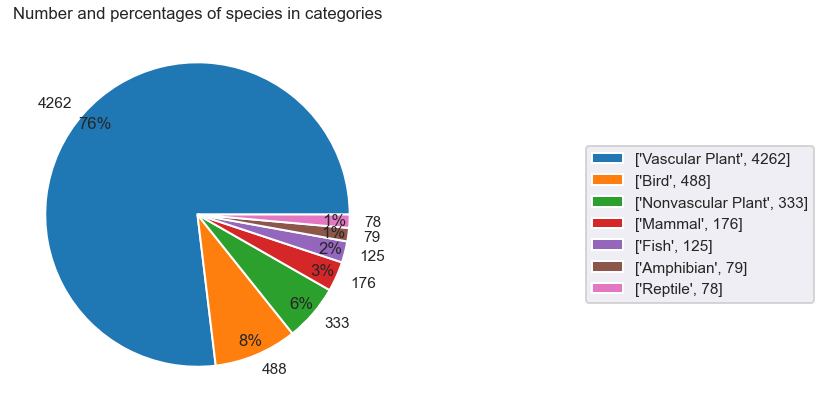

In [448]:
sns.set_context('poster',font_scale=0.7)
plt.figure(figsize = (20,7))
df_count_categories = df_species.category.value_counts().reset_index()
categories = df_count_categories['index'].values.tolist()
plt.pie(df_count_categories.category, autopct = '%d%%', pctdistance = 0.9, labels = df_count_categories.category)
plt.legend(df_count_categories.values.tolist(), bbox_to_anchor=(1.5,0.7))
plt.title('Number and percentages of species in categories')
plt.savefig('Species_in_categories.png')
plt.show()

Let's see what conservation status the species from the list are under.

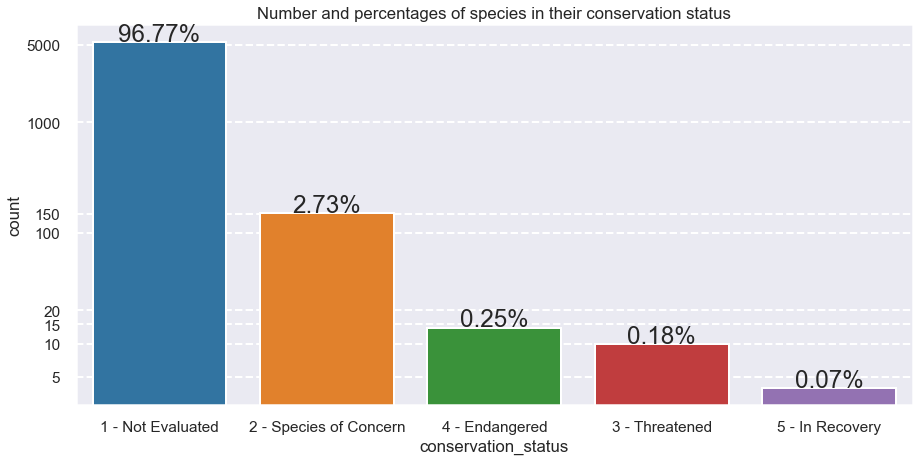

,conservation_status,number_of_species
0,1 - Not Evaluated,5362
1,2 - Species of Concern,151
2,4 - Endangered,14
3,3 - Threatened,10
4,5 - In Recovery,4
5,Total Under Protection,179


In [452]:
plt.figure(figsize = (15,7))
ax = sns.countplot(x = 'conservation_status', data = df_species)
plt.yscale('log')
plt.gca().yaxis.set_major_locator(ticker.FixedLocator([0,5,10,15,20,100,150,1000,5000]))
plt.gca().yaxis.set_major_formatter(ticker.FixedFormatter([0,5,10,15,20,100,150,1000,5000]))
plt.grid(True, axis = 'y',linestyle = '--')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/5541:.2%}', (x + width/2, y + height*1.02), ha='center', size = 'x-large')
plt.title('Number and percentages of species in their conservation status')
plt.savefig('Species_in_statuses.png')
plt.show()
table2 = df_species.conservation_status.value_counts().rename_axis('conservation_status').reset_index(name = 'number_of_species')
table2.loc[5] = ['Total Under Protection',sum(table2[table2['conservation_status']!='1 - Not Evaluated'].number_of_species)]
table2

The conservation status 96.77% of species is not evaluated, so these species are not under conservation status. We have a concern for nearly 3% of the species from the list.

Lets look at the categories of 179 species under conservation status.


<Figure size 1440x720 with 0 Axes>

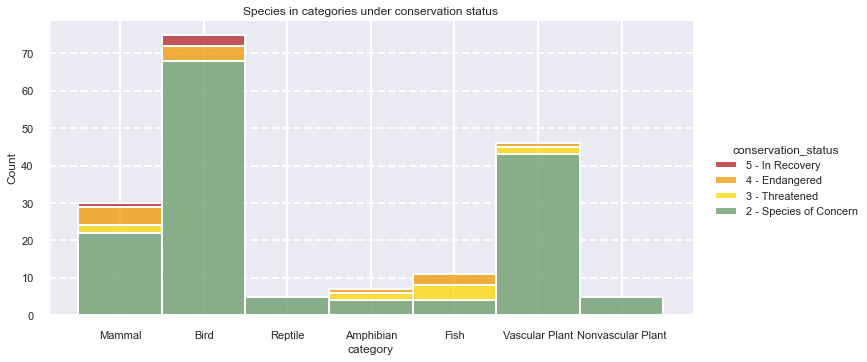

,1 - Not Evaluated,2 - Species of Concern,3 - Threatened,4 - Endangered,5 - In Recovery,Total,% species under conservation status
category,,,,,,,
Amphibian,72,4,2,1,0,79,8.86
Bird,413,68,0,4,3,488,15.37
Fish,114,4,4,3,0,125,8.80
Mammal,146,22,2,5,1,176,17.05
Nonvascular Plant,328,5,0,0,0,333,1.50
Reptile,73,5,0,0,0,78,6.41
Vascular Plant,4216,43,2,1,0,4262,1.08


In [457]:
statuses = ['1 - Not Evaluated', '2 - Species of Concern', '3 - Threatened','4 - Endangered', '5 - In Recovery']
plt.figure(figsize = (20,10)) 
sns.set_context('poster',font_scale=0.5)
palette = ["#B22222", "#F09800", "#FFD700", "#669966"]
ax2 = sns.displot(df_species[df_species.conservation_status != 'Not Evaluated'], x='category', 
            hue='conservation_status', multiple='stack', aspect = 2, hue_order = reversed(statuses[1:]), palette=sns.color_palette(palette, len(palette)) )
plt.grid(True, axis = 'y',linestyle = '--')
plt.title('Species in categories under conservation status')
plt.savefig('At-risk_Species.png')
plt.show()
table = pd.pivot_table(df_species, values = 'scientific_name', index = ['category'], columns = ['conservation_status'], aggfunc = {'count'}, fill_value = 0)
levels = table.columns.levels#define multiindex
table.columns = levels[1]#delete multiindex
df_table = pd.DataFrame(table.to_records())#transform pivot table to dataframe
df_table = df_table.set_index(['category'])#category became index
df_table['Total'] = df_table.sum(axis=1)
df_table['% species under conservation status'] = round(df_table.drop(['1 - Not Evaluated','Total'], axis = 1).sum(axis = 1)*100/df_table.Total,2)
df_table


If you look at the percentages of species under conservation status (the last column of the table), you can see that  Mammals and Birds are in a more dangerous state (17.05% and 15.37%, respectively). But as we can see from the composition of stacked bars, work on protection is underway and some species are in the status of In Recovery.

Consider the distribution of observations. As we can see from the first picture it is not normal distribution. So we decided to look it for each park separately.
In the second picture we see 4 normal distributions. 

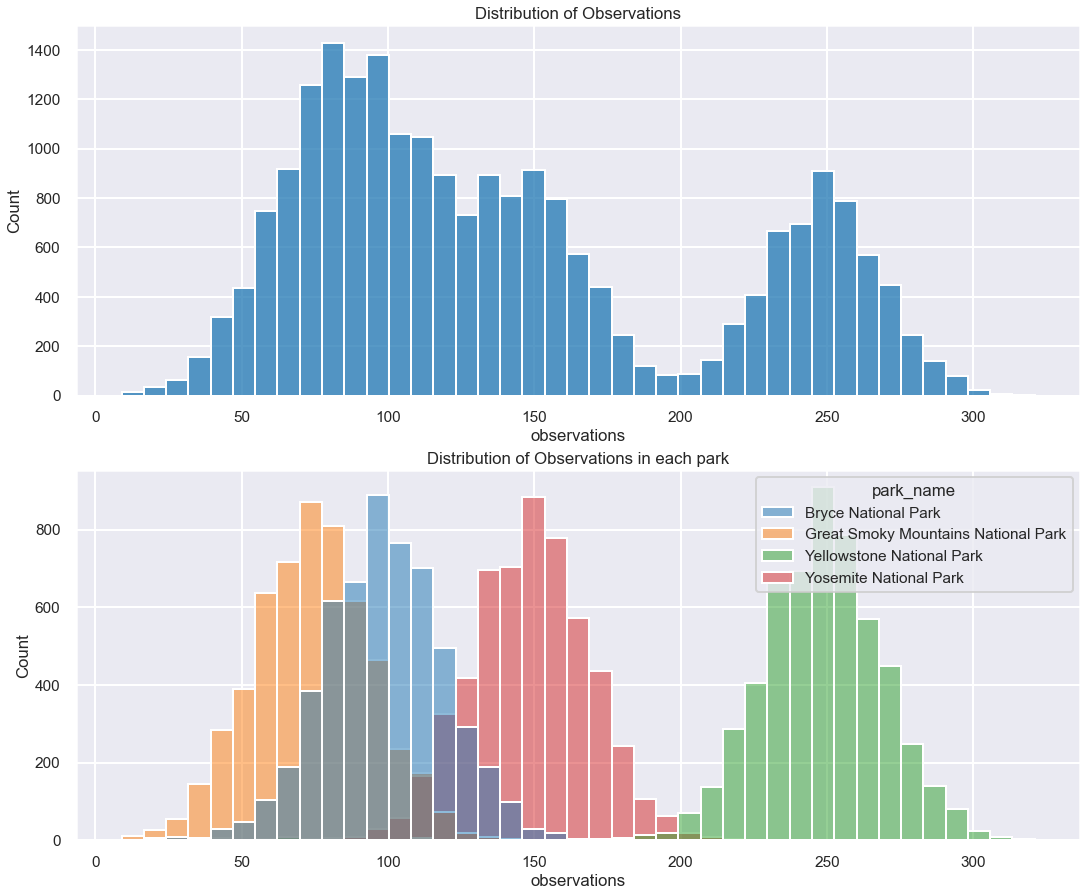

In [459]:
plt.figure(figsize = (18,15)) 
sns.set_context('poster',font_scale=0.7)
plt.figure(1)
plt.subplot(2,1,1)
sns.histplot(data = df, x = 'observations')
plt.title('Distribution of Observations')
plt.subplot(2,1,2)
sns.histplot(data = df, x = 'observations', hue = 'park_name')
plt.title('Distribution of Observations in each park')
plt.savefig('dist_observ.png')
plt.show()


The position of each distribution of observations relative to others is determined by the number of observations. We see that Yellowstone National Park has more observations than others. This difference in the number of observations due to the size of the parks (Yellowstone is the largest).

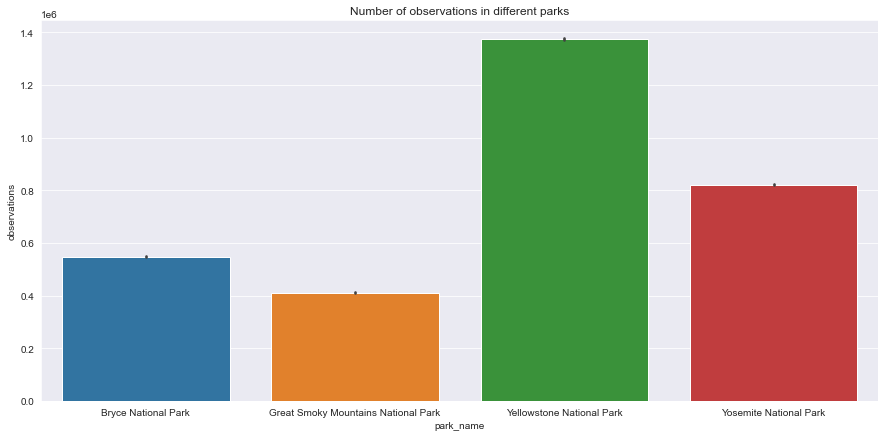

In [435]:
plt.figure(figsize = (15,7)) 
sns.barplot(data = df, x = 'park_name', y = 'observations', estimator = np.sum)
plt.title('Number of observations in different parks')
plt.show()

 Therefore, further we will look at the distribution of observations for each park separately. 

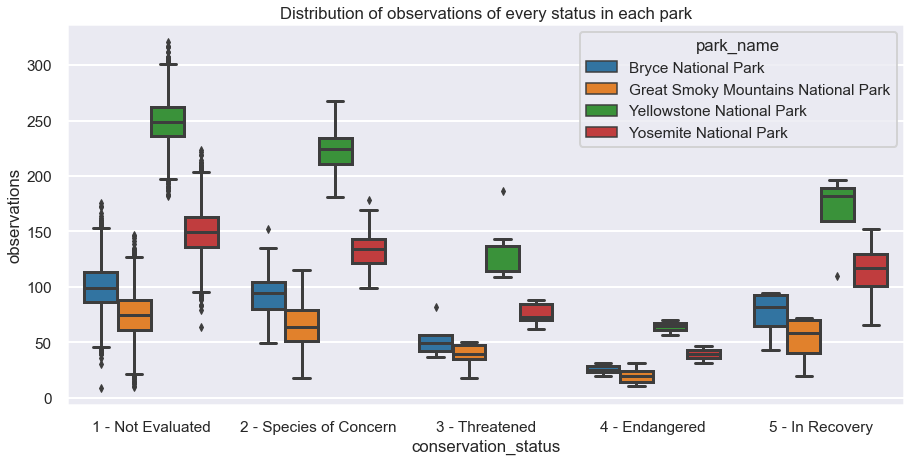

Bryce National Park
std  1 - Not Evaluated  =  20.063363520975283
std  2 - Species of Concern  =  18.51005224523449
std  3 - Threatened  =  12.58928115501437
std  4 - Endangered  =  3.308153193402689
std  5 - In Recovery  =  20.37972849017703
Great Smoky Mountains National Park
std  1 - Not Evaluated  =  19.76650816930022
std  2 - Species of Concern  =  18.95065195007612
std  3 - Threatened  =  9.695359714832659
std  4 - Endangered  =  6.0781475427156595
std  5 - In Recovery  =  21.17978596051748
Yellowstone National Park
std  1 - Not Evaluated  =  19.687562741569234
std  2 - Species of Concern  =  18.207534290181812
std  3 - Threatened  =  22.724656213021134
std  4 - Endangered  =  3.907084094622098
std  5 - In Recovery  =  33.80366104433069
Yosemite National Park
std  1 - Not Evaluated  =  19.89884156932027
std  2 - Species of Concern  =  15.726257075849885
std  3 - Threatened  =  8.498382198983522
std  4 - Endangered  =  4.745029622926392
std  5 - In Recovery  =  31.12474899497183


In [461]:
plt.figure(figsize = (15,7)) 
plt.title('Distribution of observations of every status in each park')
sns.boxplot(data = df, x = 'conservation_status', y = 'observations', hue = 'park_name', order = statuses)
plt.savefig('obs_boxplot.png')
plt.show()
table1 = pd.pivot_table(df, values = 'observations', index = 'scientific_name', columns = 'conservation_status')
for park in parks:
    table = pd.pivot_table(df[df.park_name == park], values = 'observations', index = 'scientific_name', columns = 'conservation_status')
    print(park)
    for status in statuses:
        print('std ', status, ' = ', np.std(table[status]))

The boxplot shows the dependence of the number of observations and the conservation status of the species. We consider each park separately. The species that are not under conservation status have the largest number of the observations(and boxplot is higher then others). The species in status "2 - Species of Concern" has the average number of observations and self-distribution lower than the previous one. The species in "3 - Threatened" boxplot is even lower (this species have even fewer observations). The smallest number of observations has the "4-Endangered" status. This is the most dangerous status (High risk of extinction in the wild). In the "5 - In Recovery" status, the boxplot is higher than in the previous one (The number of observations is increasing).

The use of statistical testing for our data is not correct, since the variances of the datasets should be equal ( std1/std2 ~ 1), and we see that our variances differ greatly.

The conservation status of a species indicates whether the group still exists and how likely the group is to become extinct in the near future. Many factors are taken into account when assessing conservation status: not simply the number of induviduals remaining, but the overall increase or decrease in the population over time, breeding  successrates and known threats. In our data we have information only about the number of individuals remaining (observations) and we see strong dependence of the number of observations and the conservation status. 

Taking this into account, we will compile a list for each park of those varieties that need to be paid attention to in order to prevent the transition to a more dangerous status. In my opinion, this list includes those varieties whose observations are much lower than the values for the group, or rather fall into the IQR of the group of the more dangerous status. We will consider only statuses: Species of Concern,  Threatened, Endangered. Lets look at the boxplot only for them.

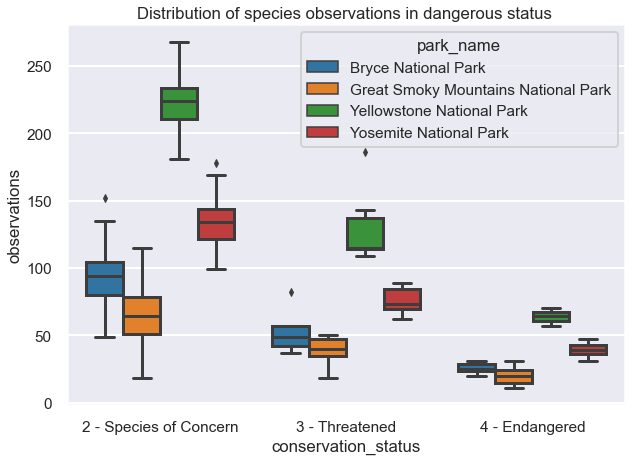

,2 - Species of Concern,3 - Threatened,4 - Endangered
park_name,,,
Bryce National Park,104.50,56.50,28.50
Great Smoky Mountains National Park,78.75,47.25,24.50
Yellowstone National Park,234.00,137.25,67.00
Yosemite National Park,143.50,84.25,42.75


In [463]:
plt.figure(figsize = (10,7))
df_danger = df[(df.conservation_status=='2 - Species of Concern')|(df.conservation_status=='3 - Threatened')|(df.conservation_status=='4 - Endangered')]
sns.boxplot(data = df_danger, x = 'conservation_status', y = 'observations', hue = 'park_name', order = statuses[1:4])
plt.title('Distribution of species observations in dangerous status ')
plt.savefig('warn_status.png')
plt.show()
#table_dangQ1 = pd.pivot_table(df_danger, values=['observations'], index = ['park_name'], columns = ['conservation_status'],
                          #  aggfunc ={'observations': (lambda x: np.quantile(x,0.25))})#table of quartiles Q1
table_dangQ3 = pd.pivot_table(df_danger, values=['observations'], index = ['park_name'], columns = ['conservation_status'],
                            aggfunc ={'observations': (lambda x: np.quantile(x,0.75))})#table of quartiles Q3
#df_Q1 = pd.DataFrame(table_dangQ1.to_records())
#df_Q1 = df_Q1.set_index(['park_name'])
#df_Q1.columns = statuses[1:4]
df_Q3 = pd.DataFrame(table_dangQ3.to_records())
df_Q3 = df_Q3.set_index(['park_name'])
df_Q3.columns = statuses[1:4]
display(df_Q3)


In [438]:
df_danger_copy = df_danger[['scientific_name','park_name','conservation_status','observations']].copy()#copy for 3 needed columns
for status in statuses[1:4]:
    name = 'Q3 '+status
    df_danger_copy[status] = df_danger_copy.apply(lambda x: df_Q3.loc[x.park_name, status], axis = 1)#add value Q3 in table
df_danger_copy['warning'] = df_danger_copy.apply(lambda x: '!!!' if ((x.conservation_status == '2 - Species of Concern')&(x.observations<x['3 - Threatened']))|
                                                     ((x.conservation_status == '3 - Threatened')&(x.observations<x['4 - Endangered'])) else 'OK', axis = 1)
df_danger_copy = df_danger_copy[df_danger_copy.warning == '!!!']
for park in parks:
    dict_warning[park] = df_danger_copy[df_danger_copy.park_name == park].scientific_name.values.tolist()
pprint.pprint(dict_warning)

{'Bryce National Park': ['Cathartes aura',
                         'Cottus bairdii',
                         'Piranga rubra',
                         'Plagiomnium carolinianum',
                         'Rallus elegans'],
 'Great Smoky Mountains National Park': ['Achnatherum contractum',
                                         'Asio flammeus',
                                         'Botrychium ascendens',
                                         'Buteo lineatus',
                                         'Cardamine clematitis',
                                         'Cathartes aura',
                                         'Chlidonias niger',
                                         'Contopus cooperi',
                                         'Coturnicops noveboracensis',
                                         'Cygnus buccinator',
                                         'Elanoides forficatus',
                                         'Erimonax monachus',
                    

# Сonclusions:

* In given files there are data from 4 national parks (Yellowstone National Park, Yosemite National Park, Bryce National Park and Great Smoky Mountains National Park), 5541 species with various conservation statuses (Species of Concern, Threatened, Endangered, In Recovery), number of observation in the past 7 days.                        
* 76% of all observed species are Vascular Plants. Others: Nonvascular Plants, Mammals, Birds, Fishes, Amphibians and Reptiles.
* Approximately 97% of all species have not been assigned a conservation status. Only 179 species are protected (those with a conservation status).
* Mammals and Birds are in a more dangerous state.
* Observations in each park have normal distribution.
* We noticed the dependence of the conservation status and the number of observations by constucting boxplots for each park. But the use of statistical testing for this data is not correct because the variance of the datasets is not equal.
* After analyzing the data, we have compiled a list of those species to which each park should pay attention in order to prevent the transition of this species to a more dangerous status. These results can be viewed in the dictionary named _dict_warning_.

# Further research:
   * Since the distribution of observations is not normal, in the analysis we considered the data for each park separately. Given the data on the size of the parks, it will be possible to use the quantity: the number of observations per square meter, to bring data of all the parks together.
   * Many factors are taken into account when assessing conservation status, not simply the number of induviduals remaining.  So further research requires data on population change over time.